### Modelo Serie Temporal (Ajustado a Aprendizaje Supervisado)

In [0]:
#Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
#Configuramos pandas para que lanze valores con una precision de hasta 6 decimales
pd.set_option('display.float_format', '{:.6f}'.format)
import sys
# Establecer la opción de impresión para mostrar el array completo
np.set_printoptions(threshold=sys.maxsize)

In [0]:
#1. Leemos los datos de PROCEESED la tabla Delta 
# df_delta2 = spark.read.format("delta").load("/mnt/datalakemlopsd4m/presentation/proyectocongestion_presentation/tablacaracteristicas_congestion_tabladelta_v3")
df_delta2 = spark.read.format("delta").load("/mnt/datalakemlopsd4m/presentation/proyectocongestion_presentation/data_congestion_serietemp_balanceada")
datos_cong_balanceado = df_delta2.toPandas()
datos_cong_balanceado.head()

,instant_date_t,congestion,eq_id,x,y,z,bearing_t,speed_t,gear_t,pitch_t,roll_t,n_sat,tramosidsnew_t,id_trabaj_t,tempeje1_t,tempeje2_t,tempeje3_t,tempeje4_t,tempeje5_t,tempeje6_t,presllanta1_t,presllanta2_t,presllanta3_t,presllanta4_t,presllanta5_t,presllanta6_t,isload_t,tonelaje_t,marcha_t,latitude_t,longitud_t,precisiongps_t,direccion_t,combustibleint_t,frecuencia_t,templlanta1_t,templlanta2_t,templlanta3_t,templlanta4_t,templlanta5_t,templlanta6_t,bateriasensorllanta1_t,bateriasensorllanta2_t,bateriasensorllanta3_t,bateriasensorllanta4_t,bateriasensorllanta5_t,bateriasensorllanta6_t,segment_angle_t,fuel_rate_t,id_equipment,id_path,id_worker,start_xcoorint,start_ycoorint,start_zcoorint,end_xcoorint,end_ycoorint,end_zcoorint,alert_level,id_equipment_congestion,id_equipo,ENG_SPD,BOOST_PRES,SYS_VOLTAGE,ENG_OIL_PRES,THROTTL_POS,GROUND_SPD,AMB_AIR_TEMP,AIR_FLTR,HI_BOOST_PRES,ENG_COOL_TEMP,RT_LT_EXH_TEMP,LO_BOOST_PRES,LCKUP_SLIP,TRN_LUBE_TEMP,DIFF_LUBE_PRES,DIFF_TEMP,AUTO_LUBE,TRN_OUT_SPD,TC_OUT_TEMP,Gear,BRK/AIR_PRES,BRK_STROKE,RETARDER,RETARDER_MODE,RTF_LTF_BRKTEMP,RTR_LTR_BRKTEMP,RT_F_BRK_TEMP,RT_R_BRK_TEMP,LT_R_BRK_TEMP,SERV_BRK_STAT,PAYLOAD,Z_Coor,Tire_Press_N4,Hourmeter_MSPU,Lon_Coor,Speed_GPS,Direction,Lat_Coor,Tire_Press_N6,Lat,year,mes,dia,hora,minuto
0,2024-04-07 20:22:07,0,61,5747788,6698336,64520,50,19,0,189,-168,12,-1,673,86,86,85,85,0,0,0,0,0,0,0,0,1,1383,0,-15207896,-75111030,400,50,88,2,0,0,0,0,0,0,0,0,0,0,0,0,0,204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61,698.691243,4.000000,0.000000,465.000000,0.000000,0.000000,30.790000,0.000000,0.000000,87.000000,2.000000,0.000000,0.920000,94.000000,0.000000,82.000000,0.000000,0.000000,86.000000,0.000000,829.000000,0.000000,0.000000,3.000000,0.000000,0.000000,86.000000,85.000000,85.000000,0.000000,138.300000,645.107834,-75.110000,182.640000,-15.200000,-15.207896,-75.111032,48807509.529940,831867650.000000,64510.783433,2024,4,23,16,7
1,2024-04-07 20:22:08,0,199,5869496,6644852,76607,144,0,0,52,504,19,-1,-1,56,59,61,62,0,0,0,0,0,0,0,0,0,0,0,-15212737,-75099700,300,144,66,2,0,0,0,0,0,0,0,0,0,0,0,0,0,170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024,4,19,16,38
2,2024-04-07 20:22:09,0,199,5858844,6644509,78579,221,13,0,25,73,12,-1,-1,50,53,57,57,0,0,0,0,0,0,0,0,0,0,0,-15212767,-75100692,350,221,78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199,699.534432,0.000000,0.000000,444.000000,0.000000,0.000000,18.790000,0.000000,0.000000,62.000000,12.000000,0.000000,1.070000,59.000000,0.000000,28.000000,0.000000,0.000000,54.000000,0.000000,737.000000,0.000000,0.000000,1.000000,-3.000000,0.000000,50.000000,57.000000,57.000000,0.000000,0.000000,785.780000,-75.100000,0.000000,-15.210000,-15.212768,-75.100688,48918576.000000,831813800.000000,78579.000000,2024,4,8,21,19
3,2024-04-07 20:22:10,0,199,5888426,6701673,79886,66,2987,6,287,213,16,-1,324,86,90,94,94,0,0,0,0,0,0,0,0,0,0,6,-15207600,-75097935,350,66,85,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199,1397.085295,75.183778,0.000000,479.000000,71.657043,30.461217,25.500000,0.500000,0.000000,85.000000,-6.718378,0.000000,1.268819,94.640811,155.718378,83.640811,0.000000,1648.951078,89.000000,6.000000,753.028644,0.000000,0.000000,2.000000,-3.640811,1.000000,87.359189,94.640811,93.640811,0.000000,0.000000,799.805774,-75.090000,51.485078,-15.200000,-15.207498,-75.097749,48950156.109478,831872112.648898,7

Ajuste de los datos para problemas de Time Series(Establecer la Frecuencia )

In [0]:
# #2. Ajuste de los datos a Series Temporales
# #2.1 Se establece la columna 'Time' como el índice del DataFrame "datos"
datos_cong_balanceado = datos_cong_balanceado.set_index('instant_date_t')

# #2.3 Ordenamos el dataset de forma ascendente segun el datetime
datos_cong_balanceado.sort_index(inplace=True)

#2.4 Identificamos la periocidad de la serie temporal
df_time_diffs = datos_cong_balanceado.index.to_series().diff().dt.total_seconds()

# # 2.4.1 Contar cuántas diferencias de tiempo tienen cada valor específico
# diferencias_frecuencias = df_time_diffs.value_counts().sort_index()
# # 2.4.2 Mostrar los recuentos
# print(diferencias_frecuencias)

#3. Eliminamos o Filtramos las filas donde la diferencia es distinta de cero (Con ello eliminamos las filas o registros de fechas duplicadas)
#datos_cong_balanceado = datos_cong_balanceado[df_time_diffs != 0]
datos_cong_balanceado = datos_cong_balanceado[df_time_diffs == 6]   # Solo nos quedamos con frecuencia que estas considerando

#4. # Reinterpolar el dataset con una periosidad en especifico
# 'S' o 'seg' : Segundo, 'T' o 'min': Minuto,'H' o 'Hr': Hora,'D': Día,'W': Semana,'M': Mes,'Q': Trimestre,'Y': Año
#datos_cong_balanceado = datos_cong_balanceado.asfreq(freq='5T', method='bfill')
datos_cong_balanceado = datos_cong_balanceado.asfreq(freq='6s', method='bfill')

# Filtramos los valores de x, y, z que son 0s
mask = (datos_cong_balanceado['x'] == 0) & (datos_cong_balanceado['y'] == 0) & (datos_cong_balanceado['z'] == 0)
datos_cong_balanceado = datos_cong_balanceado[~mask]

datos_cong_balanceado.head()

,congestion,eq_id,x,y,z,bearing_t,speed_t,gear_t,pitch_t,roll_t,n_sat,tramosidsnew_t,id_trabaj_t,tempeje1_t,tempeje2_t,tempeje3_t,tempeje4_t,tempeje5_t,tempeje6_t,presllanta1_t,presllanta2_t,presllanta3_t,presllanta4_t,presllanta5_t,presllanta6_t,isload_t,tonelaje_t,marcha_t,latitude_t,longitud_t,precisiongps_t,direccion_t,combustibleint_t,frecuencia_t,templlanta1_t,templlanta2_t,templlanta3_t,templlanta4_t,templlanta5_t,templlanta6_t,bateriasensorllanta1_t,bateriasensorllanta2_t,bateriasensorllanta3_t,bateriasensorllanta4_t,bateriasensorllanta5_t,bateriasensorllanta6_t,segment_angle_t,fuel_rate_t,id_equipment,id_path,id_worker,start_xcoorint,start_ycoorint,start_zcoorint,end_xcoorint,end_ycoorint,end_zcoorint,alert_level,id_equipment_congestion,id_equipo,ENG_SPD,BOOST_PRES,SYS_VOLTAGE,ENG_OIL_PRES,THROTTL_POS,GROUND_SPD,AMB_AIR_TEMP,AIR_FLTR,HI_BOOST_PRES,ENG_COOL_TEMP,RT_LT_EXH_TEMP,LO_BOOST_PRES,LCKUP_SLIP,TRN_LUBE_TEMP,DIFF_LUBE_PRES,DIFF_TEMP,AUTO_LUBE,TRN_OUT_SPD,TC_OUT_TEMP,Gear,BRK/AIR_PRES,BRK_STROKE,RETARDER,RETARDER_MODE,RTF_LTF_BRKTEMP,RTR_LTR_BRKTEMP,RT_F_BRK_TEMP,RT_R_BRK_TEMP,LT_R_BRK_TEMP,SERV_BRK_STAT,PAYLOAD,Z_Coor,Tire_Press_N4,Hourmeter_MSPU,Lon_Coor,Speed_GPS,Direction,Lat_Coor,Tire_Press_N6,Lat,year,mes,dia,hora,minuto
instant_date_t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-04-08 16:43:20,0,199,5861543,6655154,78193,0,0,0,77,330,17,-1,324,59,62,66,62,0,0,0,0,0,0,0,0,0,0,0,-15211805,-75100440,300,0,78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,24.290000,0.000000,0.000000,80.000000,-11.000000,0.000000,0.000000,50.000000,0.000000,66.000000,0.000000,0.000000,66.000000,0.000000,774.000000,0.000000,0.000000,1.000000,-3.000000,4.000000,59.000000,66.000000,62.000000,0.000000,0.000000,781.920000,-75.100000,0.000000,-15.210000,-15.211805,-75.100440,48921256.000000,831824450.000000,78193.000000,2024,4,8,16,43
2024-04-08 16:43:26,1,61,5870750,6770324,74620,275,1716,4,-1039,-13,12,11712,292,85,86,90,88,0,0,0,0,0,0,0,0,0,0,4,-15201393,-75099578,245,275,98,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69.000000,13072.000000,369.000000,5865504.000000,6774762.000000,72920.000000,5870586.000000,6769596.000000,74470.000000,2.000000,61.000000,61,1821.000000,28.000000,0.000000,489.000000,46.400000,21.500000,22.600000,0.500000,0.000000,81.000000,1.000000,0.000000,1.000000,89.000000,297.000000,77.000000,0.000000,1558.000000,85.000000,4.000000,786.000000,0.000000,0.000000,1.000000,0.000000,0.000000,85.000000,90.000000,88.000000,32767.000000,0.000000,744.590000,-75.090000,275.850000,-15.200000,-15.201380,-75.099696,48929192.000000,831939800.000000,74460.000000,2024,4,12,4,31
2024-04-08 16:43:32,1,61,5870750,6770324,74620,275,1716,4,-1039,-13,12,11712,292,85,86,90,88,0,0,0,0,0,0,0,0,0,0,4,-15201393,-75099578,245,275,98,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69.000000,13072.000000,369.000000,5865504.000000,6774762.000000,72920.000000,5870586.000000,6769596.000000,74470.000000,2.000000,61.000000,61,1821.000000,28.000000,0.000000,489.000000,46.400000,21.500000,22.600000,0.500000,0.000000,81.000000,1.000000,0.000000,1.000000,89.000000,297.000000,77.000000,0.000000,1558.000000,85.000000,4.000000,786.000000,0.000000,0.000000,1.000000,0.000000,0.000000,85.000000,90.000000,88.000000,32767.000000,0.000000,744.590000,-75.090000,275.850000,-15.200000,-15.201380,-75.099696,48929192.000000,831939800.000000,74460.000000,2024,4,12,4,31
2024-04-08 16:43:38,1,61,5870750,6770324,74620,275,1716,4,-1039,-13,12,11712,292,85,86,90,88,0,0,0,0,0,0,0,0,0,0,4,-15201393,-75099578,245,275,98,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69.000000,13072.000000,369.000000,5865504.000000,6774762.000000,72920.000000,5870586.000000,6769596.000000,74470.000000,2.000000,61.000000,61,1821.000000,28.000000,0.000000,489.000000,46.400000,21.500000,22.600000,0.500000,0.000000,81.000000,1.000000,0.0000

In [0]:
datos_cong_balanceado.shape

(218901, 105)

In [0]:
#datos_df = datos_cong_balanceado['congestion']  # Modelo Univariado


#En Multivariado, poner la variable a predecir, en la columna final
# c_variables = ['id_equipo','id_worker','id_path','n_sat','isload_t','marcha_t','precisiongps_t','x','y','z','direccion_t'
# ,'speed_t','pitch_t','roll_t','segment_angle_t','tonelaje_t','fuel_rate_t','combustibleint_t'
# ,'LCKUP_SLIP','BRK/AIR_PRES','RTF_LTF_BRKTEMP','RTR_LTR_BRKTEMP','RT_F_BRK_TEMP','RT_R_BRK_TEMP','LT_R_BRK_TEMP','SERV_BRK_STAT','Tire_Press_N4','Tire_Press_N6','Hourmeter_MSPU','Direction','congestion']

c_variables = ['x','speed_t','congestion']


datos_df = datos_cong_balanceado[c_variables]  # Modelo Multivariado
datos_df.head()

,x,speed_t,congestion
instant_date_t,,,
2024-04-08 16:43:20,5861543,0,0
2024-04-08 16:43:26,5870750,1716,1
2024-04-08 16:43:32,5870750,1716,1
2024-04-08 16:43:38,5870750,1716,1
2024-04-08 16:43:44,5870750,1716,1


In [0]:
#2.4 Identificamos la periocidad de la serie temporal
df_time_diffs = datos_df.index.to_series().diff().dt.total_seconds()

# # 2.4.1 Contar cuántas diferencias de tiempo tienen cada valor específico
diferencias_frecuencias = df_time_diffs.value_counts().sort_index()
# # 2.4.2 Mostrar los recuentos
print(diferencias_frecuencias)

instant_date_t
6.000000    218900
Name: count, dtype: int64


In [0]:
datos_df.index.min(), datos_df.index.max(), 

(Timestamp('2024-04-08 16:43:20'), Timestamp('2024-04-23 21:33:20'))

In [0]:
#datos_df.index.to_series().diff()

In [0]:
def add_lags(df):
    #Hacemos un diccionario con los valores del TARGET, para completar luego
    target_map = df['congestion'].to_dict()

    df['lag1'] = (df.index - pd.Timedelta('1days')).map(target_map)  #Retroceso 1, en este caso (3600*24  1 dia en segundos)
    return df

Escalar/Normalizar los datos 
- Es requerido para garantizar que todas las caracteristicas se encuentren en el mismo rango
de valores, lo que facilita el entrenamiento del Modelo y las predicciones

In [0]:
import numpy as np

def escalar_por_variables_especificas(dataframe, variables_a_escalar, medias, desviaciones_estandar):
  """
  Escala solo las variables especificadas en un dataframe de forma independiente.

  Args:
    dataframe: El dataframe que se va a escalar.
    variables_a_escalar: Una lista que contiene los nombres de las variables que se van a escalar.
    medias: Un diccionario que contiene la media de cada variable.
    desviaciones_estandar: Un diccionario que contiene la desviación estándar de cada variable.

  Returns:
    El dataframe escalado.
  """
  dataframe_escalado = dataframe.copy()
  for columna in dataframe.columns:
    if columna in variables_a_escalar:
      dataframe_escalado[columna] = (dataframe[columna] - medias[columna]) / desviaciones_estandar[columna]
  return dataframe_escalado

In [0]:

# Definir la lista de variables a escalar
variables_a_escalar = ["x", "speed_t"]  # Reemplazar con los nombres reales de las columnas

# Calcular medias y desviaciones estándar para todas las variables
medias = datos_df.mean()
desviaciones_estandar = datos_df.std()

# Escalar solo las variables especificadas en el dataframe train
df_escalado = escalar_por_variables_especificas(datos_df, variables_a_escalar, medias, desviaciones_estandar)

Generacion del DataSet Supervisado
- Función de Python llamada series_to_supervised()

In [0]:
# Función de Python llamada series_to_supervised() que toma una serie temporal univariada o multivariada y la encuadra como un #conjunto de datos de aprendizaje supervisado.
import pandas as pd
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Secuencia de observaciones como una lista o matriz NumPy 2D.
    n_in : número de observaciones de retraso como entrada ( X ). Los valores pueden estar entre [1..len(data)] Opcional. El valor predeterminado es 1.
    n_out : Número de observaciones como salida ( y ). Los valores pueden estar entre [0..len(data)-1]. Opcional. El valor predeterminado es 1.
    dropnan : valor booleano para eliminar o no filas con valores NaN. Opcional. El valor predeterminado es Verdadero.

    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))    # Aplicas los pasos hacia atras 
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))   # Aplicas los pasos hacia adelante
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)    #Eliminamos las filas Nulas de nuestro df generado(Porque no sirven en la serie temporal)
    return agg

In [0]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
numero_pasos_atras = 2  # Hiperparámetro
numero_pasos_futuro = 1   # Modelo uni-step igual a 1 paso,   MUltivariado seria mayor a 1 paso al futuro

# tr_s = series_to_supervised(tr.values, numero_pasos_atras , numero_pasos_futuro)
# vl_s = series_to_supervised(vl.values, numero_pasos_atras, numero_pasos_futuro)
# ts_s = series_to_supervised(ts.values, numero_pasos_atras, numero_pasos_futuro)

datos_df_s = series_to_supervised(datos_df.values, numero_pasos_atras, numero_pasos_futuro)

# Asignar nombres originales a las columnas
original_columns = datos_df.columns

new_columns = []
for i in range(numero_pasos_atras, 0, -1):
    new_columns += [f'{col}(t-{i})' for col in original_columns]
for i in range(0, numero_pasos_futuro):
    if i == 0:
        new_columns += [f'{col}(t)' for col in original_columns]
    else:
        new_columns += [f'{col}(t+{i})' for col in original_columns]

datos_df_s.columns = new_columns
datos_df_s.head()

,x(t-2),speed_t(t-2),congestion(t-2),x(t-1),speed_t(t-1),congestion(t-1),x(t),speed_t(t),congestion(t)
2,5860974.000000,0.000000,1.000000,5860974.000000,0.000000,1.000000,5857614,12,1
3,5860974.000000,0.000000,1.000000,5857614.000000,12.000000,1.000000,5857614,3,1
4,5857614.000000,12.000000,1.000000,5857614.000000,3.000000,1.000000,5857614,3,1
5,5857614.000000,3.000000,1.000000,5857614.000000,3.000000,1.000000,5857614,0,1
6,5857614.000000,3.000000,1.000000,5857614.000000,0.000000,1.000000,5857614,11,1


Solo nos quedamos en la ultima columna con la columna a predecir (Las demas que estan en el tiempo T se eliminan)

In [0]:
datos_df.head()

,x,speed_t,congestion
instant_date_t,,,
2024-03-27 01:15:34,5860974,0,1
2024-03-27 01:15:40,5860974,0,1
2024-03-27 01:15:46,5857614,12,1
2024-03-27 01:15:52,5857614,3,1
2024-03-27 01:15:58,5857614,3,1


In [0]:
# Solo nos quedariamos con la variable congestion(t)  como target
columns_to_drop = ['x(t)', 'speed_t(t)']
datos_df_s.drop(columns=columns_to_drop, inplace=True)
datos_df_s.head()

,x(t-2),speed_t(t-2),congestion(t-2),x(t-1),speed_t(t-1),congestion(t-1),congestion(t)
2,5860974.000000,0.000000,1.000000,5860974.000000,0.000000,1.000000,1
3,5860974.000000,0.000000,1.000000,5857614.000000,12.000000,1.000000,1
4,5857614.000000,12.000000,1.000000,5857614.000000,3.000000,1.000000,1
5,5857614.000000,3.000000,1.000000,5857614.000000,3.000000,1.000000,1
6,5857614.000000,3.000000,1.000000,5857614.000000,0.000000,1.000000,1


Separamos los datos en Train, Validation, Test

In [0]:
#Funcion para generar las particiones, siguiendo la secuencia de las series temporales
def train_val_test_split(serie, tr_size =0.8, vl_size=0.1, ts_size=0.1):
    # Definir nunmero de datos en cada subserie
    N = serie.shape[0]   #Serie seria el df, con las columnas que intervendran en el Modelo
    Ntrain = int(tr_size*N)  # Numero de datos de entrenamiento
    Nval = int(vl_size*N)
    Ntest = int(ts_size*N)

    #Realizar la particion
    train = serie[0:Ntrain]
    val = serie[Ntrain:Nval+Ntrain]
    test = serie[Nval+Ntrain:]

    return train, val, test


# Prueba de la funcion 
tr, vl, ts  = train_val_test_split(datos_df_s)

print(f'Shape del Set de Entrenamiento, {tr.shape}')
print(f'Shape del Set de Validacion, {vl.shape}')
print(f'Shape del Set de Test, {ts.shape}')

Shape del Set de Entrenamiento, (282656, 7)
Shape del Set de Validacion, (35332, 7)
Shape del Set de Test, (35333, 7)


Separamos las X(Variables predictoras) e Y(variable target), para luego poner en X_train, etc

In [0]:
def separar_X_y(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

# Separar características y objetivo para cada conjunto
X_train, y_train = separar_X_y(tr, 'congestion(t)')
X_val, y_val = separar_X_y(vl, 'congestion(t)')
X_test, y_test = separar_X_y(ts, 'congestion(t)')

In [0]:
X_train.head()

,x(t-2),speed_t(t-2),congestion(t-2),x(t-1),speed_t(t-1),congestion(t-1)
2,5860974.000000,0.000000,1.000000,5860974.000000,0.000000,1.000000
3,5860974.000000,0.000000,1.000000,5857614.000000,12.000000,1.000000
4,5857614.000000,12.000000,1.000000,5857614.000000,3.000000,1.000000
5,5857614.000000,3.000000,1.000000,5857614.000000,3.000000,1.000000
6,5857614.000000,3.000000,1.000000,5857614.000000,0.000000,1.000000


La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz específica en forma de: [muestras, pasos de tiempo, características]

In [0]:
import numpy as np
n_features = X_train.shape[1]  # número de características predictoras
# Función para reshape de X para LSTM
numero_bloques = 2     # Bloques de datos (filas) atras que iremos pasando al Modelo LSTM

def reshape_X_for_lstm(X, numero_bloques, n_features):
    n_samples = X.shape[0] - numero_bloques - numero_pasos_futuro + 1
    X_lstm = np.zeros((n_samples, numero_bloques, n_features))
    for i in range(n_samples):
        X_lstm[i] = X.iloc[i:i+numero_bloques, :].values
    return X_lstm

# Aplicar reshape para XS( X_train, X_val, X_test) para LSTM
X_train_lstm = reshape_X_for_lstm(X_train, numero_bloques, n_features)
X_val_lstm = reshape_X_for_lstm(X_val, numero_bloques, n_features)
X_test_lstm = reshape_X_for_lstm(X_test, numero_bloques, n_features)

# Función para reshape para Ys () para LSTM
def reshape_y_for_lstm(y, numero_pasos_futuro):
    return y.iloc[numero_bloques + numero_pasos_futuro - 1:].values.reshape(-1, numero_pasos_futuro, 1)

# Aplicar reshape para y_train, y_val, y_test
y_train_lstm = reshape_y_for_lstm(y_train, numero_pasos_futuro)
y_val_lstm = reshape_y_for_lstm(y_val, numero_pasos_futuro)
y_test_lstm = reshape_y_for_lstm(y_test, numero_pasos_futuro)

# Verificar las formas después del reshape para LSTM
print("Shape de X_train_lstm:", X_train_lstm.shape)
print("Shape de y_train_lstm:", y_train_lstm.shape)
print("Shape de X_val_lstm:", X_val_lstm.shape)
print("Shape de y_val_lstm:", y_val_lstm.shape)
print("Shape de X_test_lstm:", X_test_lstm.shape)
print("Shape de y_test_lstm:", y_test_lstm.shape)

Shape de X_train_lstm: (282654, 2, 6)
Shape de y_train_lstm: (282654, 1, 1)
Shape de X_val_lstm: (35330, 2, 6)
Shape de y_val_lstm: (35330, 1, 1)
Shape de X_test_lstm: (35331, 2, 6)
Shape de y_test_lstm: (35331, 1, 1)


In [0]:
X_train.head(10)

,x(t-2),speed_t(t-2),congestion(t-2),x(t-1),speed_t(t-1),congestion(t-1)
2,5860974.000000,0.000000,1.000000,5860974.000000,0.000000,1.000000
3,5860974.000000,0.000000,1.000000,5857614.000000,12.000000,1.000000
4,5857614.000000,12.000000,1.000000,5857614.000000,3.000000,1.000000
5,5857614.000000,3.000000,1.000000,5857614.000000,3.000000,1.000000
6,5857614.000000,3.000000,1.000000,5857614.000000,0.000000,1.000000
7,5857614.000000,0.000000,1.000000,5857614.000000,11.000000,1.000000
8,5857614.000000,11.000000,1.000000,5857614.000000,16.000000,1.000000
9,5857614.000000,16.000000,1.000000,5857614.000000,11.000000,1.000000
10,5857614.000000,11.000000,1.000000,5857614.000000,5.000000,1.000000
11,5857614.000000,5.000000,1.000000,5857696.000000,1.000000,1.000000


In [0]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
X_train_lstm[:15]

array([[[5.860974e+06, 0.000000e+00, 1.000000e+00, 5.860974e+06,
         0.000000e+00, 1.000000e+00],
        [5.860974e+06, 0.000000e+00, 1.000000e+00, 5.857614e+06,
         1.200000e+01, 1.000000e+00]],

       [[5.860974e+06, 0.000000e+00, 1.000000e+00, 5.857614e+06,
         1.200000e+01, 1.000000e+00],
        [5.857614e+06, 1.200000e+01, 1.000000e+00, 5.857614e+06,
         3.000000e+00, 1.000000e+00]],

       [[5.857614e+06, 1.200000e+01, 1.000000e+00, 5.857614e+06,
         3.000000e+00, 1.000000e+00],
        [5.857614e+06, 3.000000e+00, 1.000000e+00, 5.857614e+06,
         3.000000e+00, 1.000000e+00]],

       [[5.857614e+06, 3.000000e+00, 1.000000e+00, 5.857614e+06,
         3.000000e+00, 1.000000e+00],
        [5.857614e+06, 3.000000e+00, 1.000000e+00, 5.857614e+06,
         0.000000e+00, 1.000000e+00]],

       [[5.857614e+06, 3.000000e+00, 1.000000e+00, 5.857614e+06,
         0.000000e+00, 1.000000e+00],
        [5.857614e+06, 0.000000e+00, 1.000000e+00, 5.857614e+06,


#### Metodos para pasar a formato de input para Redes Neuronales LSTM
Ambos métodos pueden ser válidos dependiendo del contexto y la estructura de los datos.

(282653, 2, 7), (282653, 1, 1) para entrenamiento:

Aquí, cada muestra tiene 2 pasos de tiempo y 7 características para las variables predictoras, y un solo valor de salida. Esto es adecuado si estás modelando datos donde tienes múltiples pasos de tiempo y varias características.


(282653, 14), (282653,) para entrenamiento:

En este caso, todas las características se aplanan en una sola dimensión, lo que significa que tratas todas las características como una secuencia única de datos por muestra. Esto puede ser útil en algunos casos donde no necesitas modelar explícitamente múltiples pasos de tiempo, pero simplemente quieres predecir un solo valor en el siguiente paso de tiempo.

In [0]:
X_train_lstm.shape

(282655, 2, 3)

In [0]:
# Construccion del Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Fijar Valores parametros , para asegurar la reproducibilidad de los datos inicializados
tf.random.set_seed(123) # Semilla(inicializacion de los parametros o pesos de misma manera)
tf.config.experimental.enable_op_determinism() # Cada vez se ejecute de misma manera

# El Modelo
N_UNITS = 50 # Tamaño del estado oculto de la celda de Memoria de LSTM
INPUT_SHAPE = (X_train_lstm.shape[1], X_train_lstm.shape[2]) #pasos atras x n features (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(numero_pasos_futuro, activation='sigmoid')) # linear: problema regresion, sigmoid:clasificacion binaria, softmax:multiclase

#RSME: Para problemas de regresion, para tener errores en las mismas unidades de la variable target
# def root_mean_squared_error(y_true,y_pred):
#     rmse=tf.math.sqtr(tf.math.reduce_mean(tf.square(y_pred-y_true)))
#     return rmse

# Optimizador para problema de regresion
# optimizador = RMSprop(learning_rate=0.05)

#Compilation


# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

# Entrenamiento del Modelo
EPOCHS = 50 # Numero de epocas de entrenamiento
BATCH_SIZE = 256 # Numero de lotes que van ingresando al Modelo(Algoritmo)
historia = modelo.fit(
    x = X_train_lstm,
    y = y_train_lstm,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (X_val_lstm, y_val_lstm),
    verbose=2  #Imprime en pantalla con va el entrenamiento
)

Epoch 1/50
1105/1105 - 8s - loss: 0.5661 - accuracy: 0.7488 - auc: 0.5007 - val_loss: 0.3198 - val_accuracy: 0.9707 - val_auc: 0.5000 - 8s/epoch - 7ms/step
Epoch 2/50
1105/1105 - 5s - loss: 0.5637 - accuracy: 0.7488 - auc: 0.5000 - val_loss: 0.3244 - val_accuracy: 0.9707 - val_auc: 0.5000 - 5s/epoch - 5ms/step
Epoch 3/50
1105/1105 - 5s - loss: 0.5637 - accuracy: 0.7488 - auc: 0.5001 - val_loss: 0.3196 - val_accuracy: 0.9707 - val_auc: 0.5000 - 5s/epoch - 5ms/step
Epoch 4/50
1105/1105 - 5s - loss: 0.5637 - accuracy: 0.7488 - auc: 0.5013 - val_loss: 0.3220 - val_accuracy: 0.9707 - val_auc: 0.5000 - 5s/epoch - 5ms/step
Epoch 5/50
1105/1105 - 5s - loss: 0.5637 - accuracy: 0.7488 - auc: 0.4999 - val_loss: 0.3207 - val_accuracy: 0.9707 - val_auc: 0.5000 - 5s/epoch - 5ms/step
Epoch 6/50
1105/1105 - 5s - loss: 0.5637 - accuracy: 0.7488 - auc: 0.4998 - val_loss: 0.3347 - val_accuracy: 0.9707 - val_auc: 0.5000 - 5s/epoch - 5ms/step
Epoch 7/50
1105/1105 - 6s - loss: 0.5637 - accuracy: 0.7488 - au

#### Graficar curvas de entrenamiento y validacion, para verificar que no existe overfitting

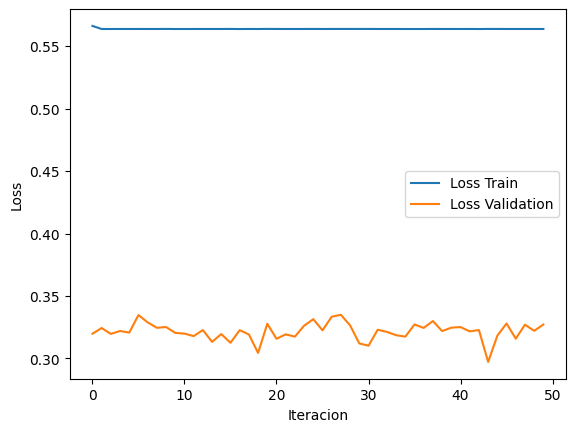

In [0]:
plt.plot(historia.history['loss'],label='Loss Train')
plt.plot(historia.history['val_loss'],label='Loss Validation')
plt.xlabel('Iteracion')
plt.ylabel('Loss')
plt.legend()

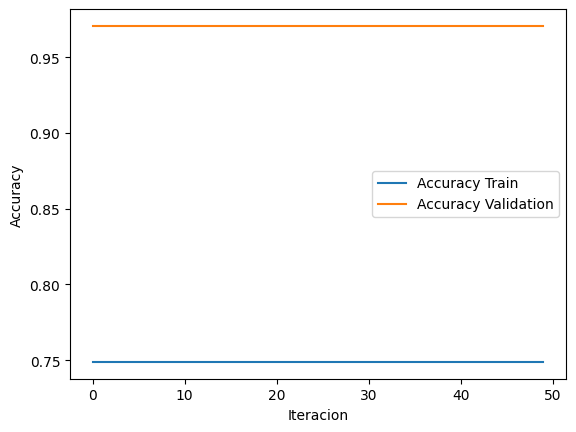

In [0]:
plt.plot(historia.history['accuracy'],label='Accuracy Train')
plt.plot(historia.history['val_accuracy'],label='Accuracy Validation')
plt.xlabel('Iteracion')
plt.ylabel('Accuracy')
plt.legend()

### Pronostico Futuro Con Multivariables

In [0]:
datos_df.index.max() 

Timestamp('2024-04-23 21:33:20')

In [0]:
futuretesting=pd.date_range(datos_df.index.max() +  pd.Timedelta('6s'), datos_df.index.max() + pd.Timedelta(days=1) , freq='6s')
futuretesting

DatetimeIndex(['2024-04-23 21:33:26', '2024-04-23 21:33:32',
               '2024-04-23 21:33:38', '2024-04-23 21:33:44',
               '2024-04-23 21:33:50', '2024-04-23 21:33:56',
               '2024-04-23 21:34:02', '2024-04-23 21:34:08',
               '2024-04-23 21:34:14', '2024-04-23 21:34:20',
               ...
               '2024-04-24 21:32:26', '2024-04-24 21:32:32',
               '2024-04-24 21:32:38', '2024-04-24 21:32:44',
               '2024-04-24 21:32:50', '2024-04-24 21:32:56',
               '2024-04-24 21:33:02', '2024-04-24 21:33:08',
               '2024-04-24 21:33:14', '2024-04-24 21:33:20'],
              dtype='datetime64[ns]', length=14400, freq='6s')

In [0]:
#Creature future dataframe
future_df=pd.DataFrame(index=futuretesting)

# #Se agrega la columna de FUTURE en el df pronostico com TRUE (para indicar que son el futuro)
future_df['isFuture'] = True

# #Se agrega la columna de FUTURE en el df Original con FALSE (para indicar no es futuro) 
datos_df['isFuture'] = False

#Se hace una concatenacion para agregar las filas de future_df al df_original
df_and_future = pd.concat([datos_df, future_df])

/root/.ipykernel/1662/command-1298455583280545-1643369372:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_df['isFuture'] = False


In [0]:
df_and_future = add_lags(df_and_future)

In [0]:
df_and_future.tail(14)

,x,speed_t,congestion,isFuture,lag1
2024-04-24 21:32:02,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:08,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:14,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:20,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:26,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:32,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:38,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:44,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:50,NaN,NaN,NaN,True,0.000000
2024-04-24 21:32:56,NaN,NaN,NaN,True,0.000000


In [0]:
#Filtramos solo el Dataset Esqueleto para el Pronostico
future_dates_pronostico = df_and_future.query('isFuture').copy()
future_dates_pronostico.head()

,x,speed_t,congestion,isFuture,lag1
2024-04-23 21:33:26,NaN,NaN,NaN,True,1.000000
2024-04-23 21:33:32,NaN,NaN,NaN,True,1.000000
2024-04-23 21:33:38,NaN,NaN,NaN,True,1.000000
2024-04-23 21:33:44,NaN,NaN,NaN,True,1.000000
2024-04-23 21:33:50,NaN,NaN,NaN,True,1.000000


In [0]:
futuretesting - pd.Timedelta(days=1)

DatetimeIndex(['2024-04-22 21:33:26', '2024-04-22 21:33:32',
               '2024-04-22 21:33:38', '2024-04-22 21:33:44',
               '2024-04-22 21:33:50', '2024-04-22 21:33:56',
               '2024-04-22 21:34:02', '2024-04-22 21:34:08',
               '2024-04-22 21:34:14', '2024-04-22 21:34:20',
               ...
               '2024-04-23 21:32:26', '2024-04-23 21:32:32',
               '2024-04-23 21:32:38', '2024-04-23 21:32:44',
               '2024-04-23 21:32:50', '2024-04-23 21:32:56',
               '2024-04-23 21:33:02', '2024-04-23 21:33:08',
               '2024-04-23 21:33:14', '2024-04-23 21:33:20'],
              dtype='datetime64[ns]', length=14400, freq='6s')

In [0]:
# Identificamos las columnas a completar usando los datos del día anterior
columns_to_fill = ['x', 'speed_t']

# Rellenamos las columnas específicas con los valores del día anterior
for col in columns_to_fill:
    future_dates_pronostico[col] = df_and_future[col].loc[futuretesting - pd.Timedelta(days=1)].values

# Las otras columnas se quedan con NaN o el valor que tenías en el DataFrame de predicción
future_dates_pronostico.head()

,x,speed_t,congestion,isFuture,lag1
2024-04-23 21:33:26,5857778.000000,1.000000,NaN,True,1.000000
2024-04-23 21:33:32,5857778.000000,1.000000,NaN,True,1.000000
2024-04-23 21:33:38,5857778.000000,1.000000,NaN,True,1.000000
2024-04-23 21:33:44,5857778.000000,1.000000,NaN,True,1.000000
2024-04-23 21:33:50,5857778.000000,1.000000,NaN,True,1.000000


In [0]:
FEATURES = ['x','speed_t','lag1']

In [0]:
def reshape_X_for_lstm(X, numero_bloques, n_features):
    n_samples = X.shape[0] - numero_bloques - numero_pasos_futuro + 1
    X_lstm = np.zeros((n_samples, numero_bloques, n_features))
    for i in range(n_samples):
        X_lstm[i] = X.iloc[i:i+numero_bloques, :].values
    return X_lstm